# KDD

**Knowledge Discovery in Databases (KDD)** is a comprehensive, iterative process for discovering useful patterns and insights from large datasets. It is commonly used in data science projects, including predictive modeling and classification tasks. The KDD process involves the following phases:
1. **Data Selection**
2. **Data Preprocessing**
3. **Data Transformation**
4. **Data Mining**
5. **Interpretation/Evaluation**

In this project, we want to predict Avocado prices. The goal is to understand price patterns based on features such as region, date, type, and other factors.

## 1. Data Selection

In this phase, we are trying to identify the relevant data sources and select a subset of data that is pertinent to the problem.

We are using the [Avocado Prices dataset](https://www.kaggle.com/datasets/neuromusic/avocado-prices) to perform our task. We will be looking at our data source and trying to understand relevant columns for our use case.

In [36]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Uploading kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Accessing dataset from kaggle directly
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d neuromusic/avocado-prices

Dataset URL: https://www.kaggle.com/datasets/neuromusic/avocado-prices
License(s): ODbL-1.0
  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 13.7MB/s]


In [4]:
# Extracting the csv
!unzip avocado-prices.zip
!rm -rf avocado-prices.zip

Archive:  avocado-prices.zip
  inflating: avocado.csv             


In [29]:
# Loading the dataset into a dataframe
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


With the dataset loaded into the dataframe, we can now take an initial look on it. First, we will observe the basic structure of the dataset.

In [6]:
# Get some basic info on all columns in the df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [7]:
# Get some statistical info on the numerical columns
print(df.describe())

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05 

Since the bag columns and volume columns seem to have a logical correlation, we should try checking the correlation matrix for this phase.

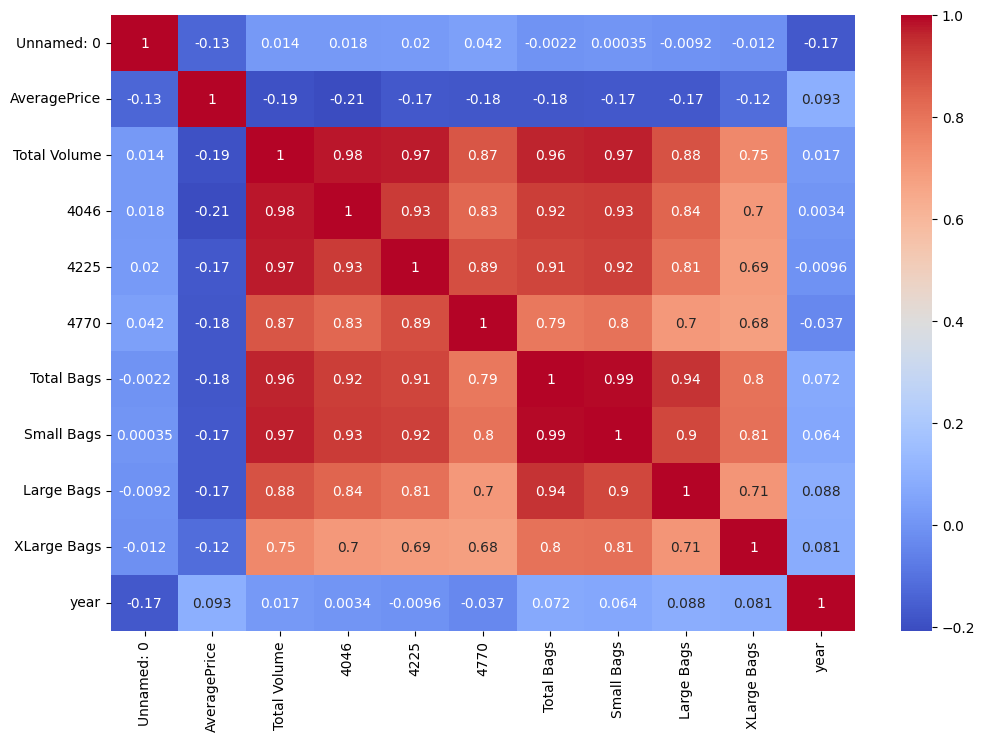

In [9]:
# Correlation matrix
df_numerical = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

As we can see, all the bag and volume columns have a high correlation factor (> 0.7), so we will drop most of them and retain only the total volume. We will also drop the first unnamed column (as it is not useful) as well as the year, since it is redundant. With our dataset ready, we can now proceed to the next phase.

In [30]:
# Drop unnecessary columns
selected_columns = ['Date', 'Total Volume', 'type', 'region', 'AveragePrice']
df = df[selected_columns]
df.head()

,Date,Total Volume,type,region,AveragePrice
0,2015-12-27,64236.62,conventional,Albany,1.33
1,2015-12-20,54876.98,conventional,Albany,1.35
2,2015-12-13,118220.22,conventional,Albany,0.93
3,2015-12-06,78992.15,conventional,Albany,1.08
4,2015-11-29,51039.60,conventional,Albany,1.28


## 2. Data Preprocessing

This phase focuses on cleaning, transforming, and preparing data for analysis, including addressing inconsistencies such as handling missing values or duplicate values.

Firstly, let's look at the missing values from the data.

In [13]:
# Check for missing values
print(df.isnull().sum())

Date            0
Total Volume    0
type            0
region          0
AveragePrice    0
dtype: int64


As we do not have any missing values, we don't need to perform imputation steps which generally involve handling null, empty, or invalid values. Hence, we can move on to the next phase.

## 3. Data Transformation

This phase involves converting data into suitable forms for mining by creating new features or aggregating existing ones.

In [31]:
# Extract year, month, and week from date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df.drop('Date', axis=1, inplace=True)
df.head()

,Total Volume,type,region,AveragePrice,Year,Month,Week
0,64236.62,conventional,Albany,1.33,2015,12,52
1,54876.98,conventional,Albany,1.35,2015,12,51
2,118220.22,conventional,Albany,0.93,2015,12,50
3,78992.15,conventional,Albany,1.08,2015,12,49
4,51039.60,conventional,Albany,1.28,2015,11,48


Now we want to encode the categorical columns. In this case, we have type and region columns. The type column is binary so we will use label encoding, and for region, we will use one-hot encoding.

In [32]:
# Encode categorical columns into numerical
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,Total Volume,type,AveragePrice,Year,Month,Week,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,0,1.33,2015,12,52,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,54876.98,0,1.35,2015,12,51,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,118220.22,0,0.93,2015,12,50,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,78992.15,0,1.08,2015,12,49,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,51039.60,0,1.28,2015,11,48,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now we will scale the total volume column to standardize the dataset.

In [24]:
# Scaling the total volume column
scaler = StandardScaler()
df[['Total Volume']] = scaler.fit_transform(df[['Total Volume']])
df.head()

,Total Volume,type,AveragePrice,Year,Month,Week,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.227716,0,1.33,2015,12,52,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.230427,0,1.35,2015,12,51,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.212085,0,0.93,2015,12,50,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.223444,0,1.08,2015,12,49,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.231538,0,1.28,2015,11,48,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We can also create our new features from this, such as Seasons using the Month column.

In [33]:
# Create a 'Season' column based on the 'Month'
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)
df.head()

,Total Volume,type,AveragePrice,Year,Month,Week,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,Season_Spring,Season_Summer,Season_Winter
0,64236.62,0,1.33,2015,12,52,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,54876.98,0,1.35,2015,12,51,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,118220.22,0,0.93,2015,12,50,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,78992.15,0,1.08,2015,12,49,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,51039.60,0,1.28,2015,11,48,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


With the data transformation complete, we can now move on to the next phase.

## 4. Data Mining

Applying statistical and machine learning techniques to discover patterns or build predictive models.

After obtaining the training and testing dataset, we will try

In [ ]:
# Create training and testing subsets
X = df.drop(['AveragePrice'], axis=1)
y = df['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As this is a regression problem, we will be using the following models:
1. Linear Regression
2. Decision Trees
3. Random Forests
4. Gradient Boost Regressor (XGBoost)
5. Support Vector Regressor (SVR)

In [37]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, use_label_encoder=False, eval_metric='rmse', random_state=42),
    "Support Vector Regressor": SVR()
}

# List to collect results
results_list = []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Add the results to the list
    results_list.append({'Model': model_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

# Convert the results list to a DataFrame
results = pd.DataFrame(results_list)

# Display the results
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:17:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/loc

                      Model       MAE       MSE      RMSE        R2
0         Linear Regression  0.195352  0.066639  0.258146  0.585238
1             Decision Tree  0.100567  0.024134  0.155352  0.849790
2             Random Forest  0.080728  0.013624  0.116720  0.915208
3                   XGBoost  0.094633  0.017613  0.132713  0.890378
4  Support Vector Regressor  0.315713  0.157246  0.396543  0.021305


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
results.head()

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,0.195352,0.066639,0.258146,0.585238
1,Decision Tree,0.100567,0.024134,0.155352,0.849790
2,Random Forest,0.080728,0.013624,0.116720,0.915208
3,XGBoost,0.094633,0.017613,0.132713,0.890378
4,Support Vector Regressor,0.315713,0.157246,0.396543,0.021305


As we can observe over various metrics, Random Forest seems to perform well so that will be our choice of model to move forward.

## 5. Evaluation

Analyzing the outcomes to determine the quality and validity of the discovered patterns, ensuring they are useful and actionable.

First, we will review the metrics of our model and then, check feature importance obtained from it.

In [41]:
# Select the best model
best = models["Random Forest"]
results = results[results['Model'] == 'Random Forest']
results.head()

,Model,MAE,MSE,RMSE,R2
2,Random Forest,0.080728,0.013624,0.11672,0.915208


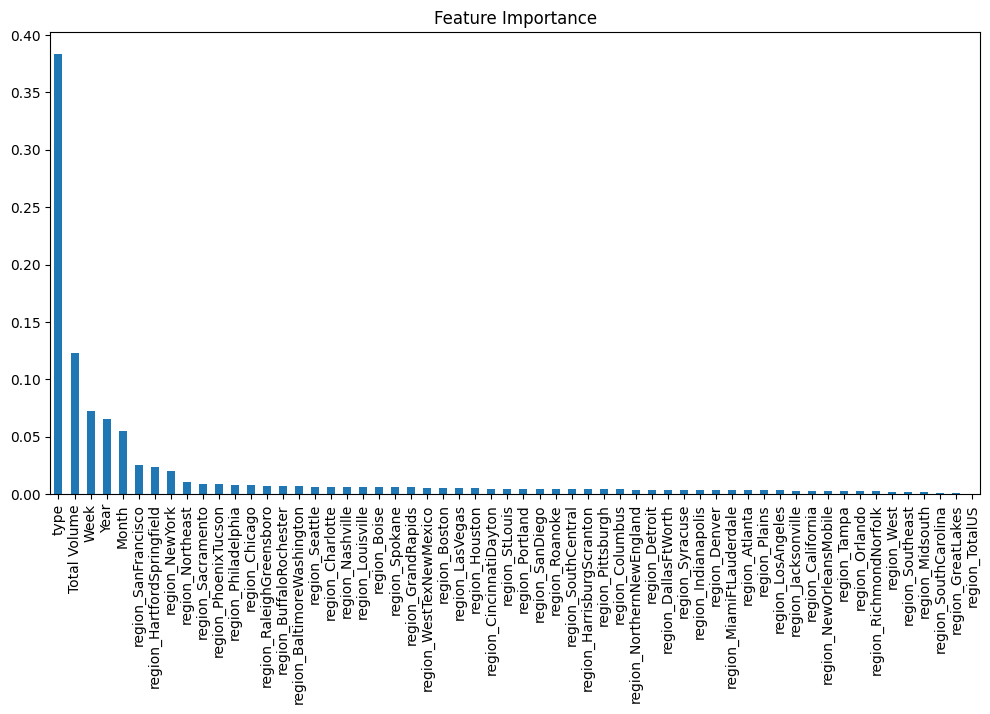

In [42]:
# View feature importance
feature_importance = pd.Series(best.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

As we can see, type has an overwhelmingly high importance compared to other features with total volume and date attributes behind. We can also see certain regions like San Francisco, Hartford Springfield, and New York seem to have higher sales as well. Now, let's check how the predicted prices compared to the original ones.

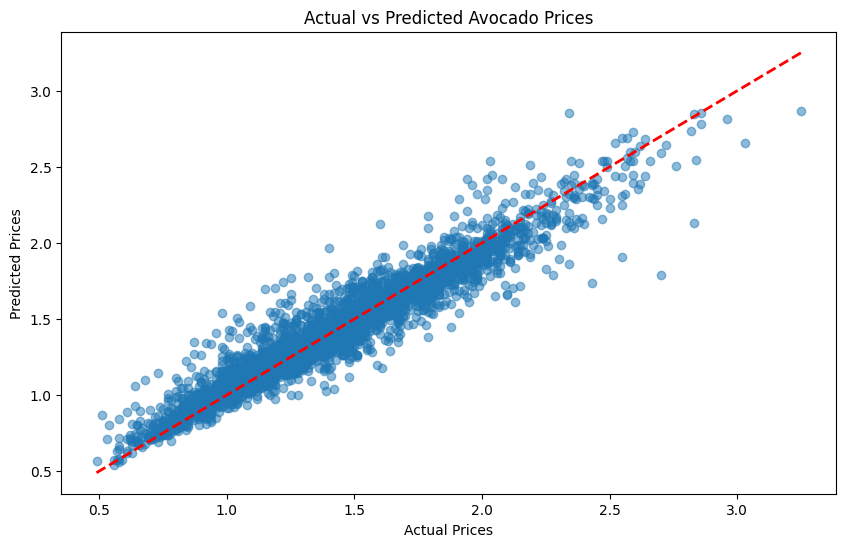

In [43]:
# Predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Avocado Prices')
plt.show()

As we can see, it is largely close to the predictions with a couple outliers. Let us perform cross validation as well for final checks.

In [45]:
# Cross validation
scores = cross_val_score(best, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-Squared Scores: {scores}')
print(f'Average R-Squared: {scores.mean()}')

Cross-Validation R-Squared Scores: [-0.14329264  0.55100948  0.61179056 -0.00964229  0.09589464]
Average R-Squared: 0.2211519505491984


It is worth noting that there is some instability in the r-squared scores, pointing toward overfitting of the data. If this is to be addressed, we may have to go with a different model instead.

However, based on the current data, we have some insights on what factors influence avocado prices.